# This is for AWS training

# Get the Data

In [9]:
# Invalid Kaggle credentials file at /home/sagemaker-user/.kaggle/kaggle.json
!mkdir /home/sagemaker-user/.kaggle 

mkdir: cannot create directory ‘/home/sagemaker-user/.kaggle’: File exists


In [10]:
!touch /home/sagemaker-user/.kaggle/kaggle.json

In [61]:
api_token = {"username":"","key":""}

In [11]:
import json 

with open('/home/sagemaker-user/.kaggle/kaggle.json','w') as file:
    json.dump(api_token,file)

In [13]:
!chmod 600 /home/sagemaker-user/.kaggle/kaggle.json

In [7]:
!pip install -q kagglehub

In [14]:
import kagglehub

# Downloads and caches automatically
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")
print("Dataset downloaded to:", path)

100%|██████████| 2.29G/2.29G [00:11<00:00, 216MB/s]

Extracting files...


Dataset downloaded to: /home/sagemaker-user/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2


In [15]:
!mkdir -p /home/sagemaker-user/data

In [18]:
!cp -r /home/sagemaker-user/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/ /home/sagemaker-user/data/

In [57]:
# WARNING: this is irreversible—double-check the path!
# Delete the data
!rm -rf ~/.cache/kagglehub/datasets/*

# Convert to LST File for Training

## Check Image

In [19]:
import glob
import random
import matplotlib.pyplot as plt


def get_random_image(dir,condition):
    placeholder=''
    if condition == 'n':
        placeholder='NORMAL'
    elif condition == 'p':
        placeholder='PNEUMONIA'
    else:
        raise Exception("Sorry, invalid condition")
    folder=f'/home/sagemaker-user/data/chest_xray/{dir}/{placeholder}/*.jpeg'
    img_paths=glob.glob(folder)
    max_length=len(img_paths)
    randomNumber=random.randint(0,max_length)
    for index, item in enumerate(img_paths, start=1):
        if index == randomNumber:
            print(index,item)
            image = plt.imread(item)
            readyImage=plt.imshow(image)
            return readyImage

4 /home/sagemaker-user/data/chest_xray/val/NORMAL/NORMAL2-IM-1436-0001.jpeg


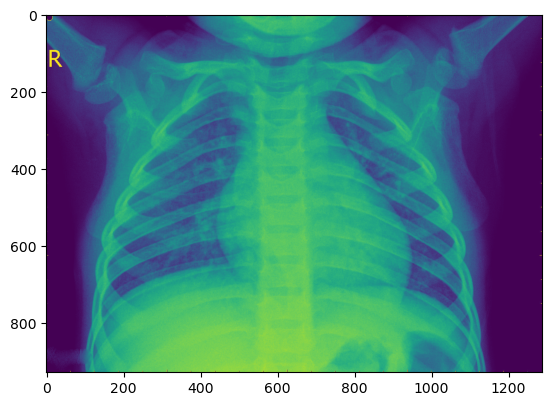

In [20]:
get_random_image("val","n")

## Convert to jpeg 244 x 244 images gray scale

In [21]:
import glob
import matplotlib.pyplot as plt
from PIL import Image

folder=f'/home/sagemaker-user/data/chest_xray/train/*/*.jpeg'

counterPneu=0
counterNormal=0

img_paths=glob.glob(folder)

for i in img_paths:
    if "person" in i:
        full_size_image=Image.open(i)
        im=full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/train' + '/train_pneumonia' + str(counterPneu)+'.jpeg',arr=im,format='jpeg',cmap='gray')
        counterPneu+=1
    else:
        full_size_image=Image.open(i)
        im=full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/train' + '/train_normal' + str(counterNormal)+'.jpeg',arr=im,format='jpeg',cmap='gray')
        counterNormal+=1

In [22]:
import glob
import matplotlib.pyplot as plt
from PIL import Image

folder=f'/home/sagemaker-user/data/chest_xray/test/*/*.jpeg'

counterPneu=0
counterNormal=0

img_paths=glob.glob(folder)

for i in img_paths:
    if "person" in i:
        full_size_image=Image.open(i)
        im=full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/test' + '/test_pneumonia' + str(counterPneu)+'.jpeg',arr=im,format='jpeg',cmap='gray')
        counterPneu+=1
    else:
        full_size_image=Image.open(i)
        im=full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/test' + '/test_normal' + str(counterNormal)+'.jpeg',arr=im,format='jpeg',cmap='gray')
        counterNormal+=1

In [23]:
import glob
import matplotlib.pyplot as plt
from PIL import Image

folder=f'/home/sagemaker-user/data/chest_xray/val/*/*.jpeg'

counterPneu=0
counterNormal=0

img_paths=glob.glob(folder)

for i in img_paths:
    if "person" in i:
        full_size_image=Image.open(i)
        im=full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/val' + '/val_pneumonia' + str(counterPneu)+'.jpeg',arr=im,format='jpeg',cmap='gray')
        counterPneu+=1
    else:
        full_size_image=Image.open(i)
        im=full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/val' + '/val_normal' + str(counterNormal)+'.jpeg',arr=im,format='jpeg',cmap='gray')
        counterNormal+=1

In [24]:
import glob
import pandas as pd

folder=f'/home/sagemaker-user/data/chest_xray/*/*.jpeg'

category=[]
filenames=[]
condition_of_lung=[]

all_files=glob.glob(folder)

for filename in all_files:
    if "train" in filename:
        if "pneumonia" in filename:
            category.append("train")
            filenames.append(filename)
            condition_of_lung.append("pneumonia")
        elif "normal" in filename:
            category.append("train")
            filenames.append(filename)
            condition_of_lung.append("normal")
    elif "test" in filename:
        if "pneumonia" in filename:
            category.append("test")
            filenames.append(filename)
            condition_of_lung.append("pneumonia")
        elif "normal" in filename:
            category.append("test")
            filenames.append(filename)
            condition_of_lung.append("normal")
    elif "val" in filename:
        if "pneumonia" in filename:
            category.append("val")
            filenames.append(filename)
            condition_of_lung.append("pneumonia")
        elif "normal" in filename:
            category.append("val")
            filenames.append(filename)
            condition_of_lung.append("normal")

all_data_df=pd.DataFrame({"dataset type":category,"x-ray result":condition_of_lung,"filename":filenames})

print(all_data_df.head())

  dataset type x-ray result                                           filename
0        train       normal  /home/sagemaker-user/data/chest_xray/train/tra...
1        train       normal  /home/sagemaker-user/data/chest_xray/train/tra...
2        train       normal  /home/sagemaker-user/data/chest_xray/train/tra...
3        train       normal  /home/sagemaker-user/data/chest_xray/train/tra...
4        train       normal  /home/sagemaker-user/data/chest_xray/train/tra...


/tmp/ipykernel_221/1439224184.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.catplot(x="x-ray result",col="dataset type",kind="count",palette="ch:.55",data=all_data_df,legend=True)


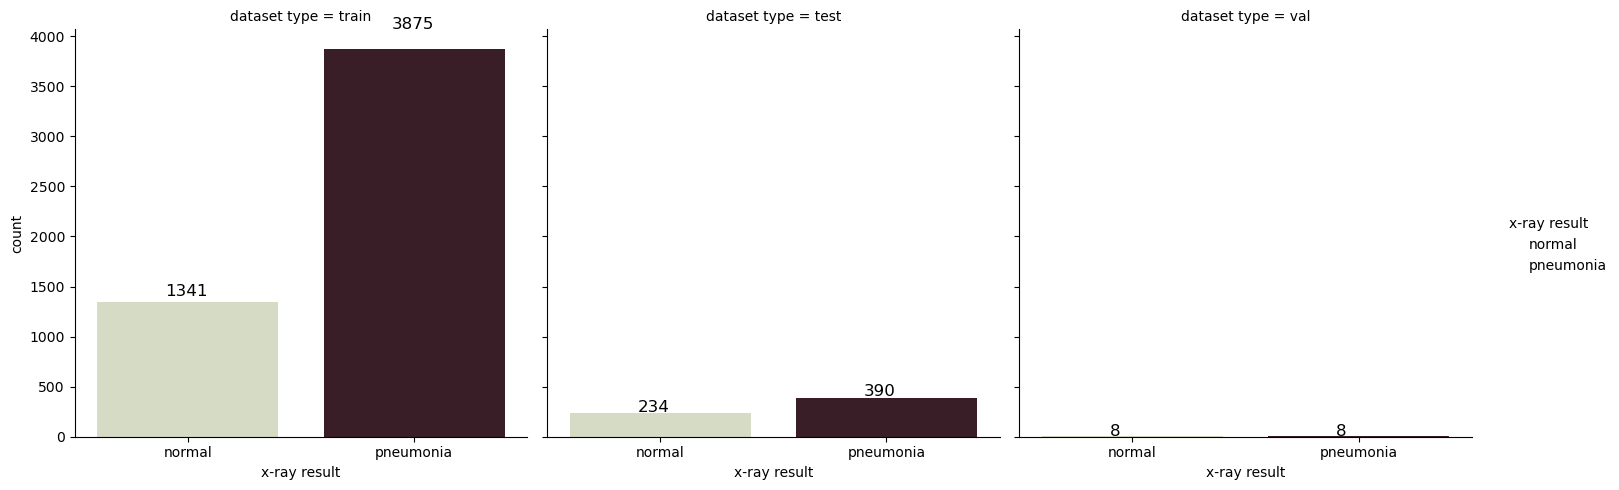

In [25]:
import seaborn as sns

g=sns.catplot(x="x-ray result",col="dataset type",kind="count",palette="ch:.55",data=all_data_df,legend=True)

for i in range(0,3):
    ax=g.facet_axis(0,i)
    for p in ax.patches:
        ax.text(p.get_x()+0.3,
        p.get_height()*1.05,
        '{0:.0f}'.format(p.get_height()),
        color='black',
        rotation='horizontal',
        size='large')

In [26]:
import glob
import pandas as pd
import os
train_folder='/home/sagemaker-user/data/chest_xray/train/*.jpeg'
train_df_lst=pd.DataFrame(columns=['labels','s3_path'],dtype=object)
train_imgs_path=glob.glob(train_folder)
counter=0
class_arg=''

for i in train_imgs_path:
    if "pneumonia" in i:
        class_arg=1
    else:
        class_arg=0
    train_df_lst.loc[counter]=[class_arg,os.path.basename(i)]
    counter+=1
print(train_df_lst.head())

   labels             s3_path
0       0  train_normal0.jpeg
1       0  train_normal1.jpeg
2       0  train_normal2.jpeg
3       0  train_normal3.jpeg
4       0  train_normal4.jpeg


In [27]:
import glob
import pandas as pd
import os
test_folder='/home/sagemaker-user/data/chest_xray/test/*.jpeg'
test_df_lst=pd.DataFrame(columns=['labels','s3_path'],dtype=object)
test_imgs_path=glob.glob(test_folder)
counter=0
class_arg=''

for i in test_imgs_path:
    if "pneumonia" in i:
        class_arg=1
    else:
        class_arg=0
    test_df_lst.loc[counter]=[class_arg,os.path.basename(i)]
    counter+=1
print(test_df_lst.head())

   labels            s3_path
0       0  test_normal0.jpeg
1       0  test_normal1.jpeg
2       0  test_normal2.jpeg
3       0  test_normal3.jpeg
4       0  test_normal4.jpeg


In [28]:
def save_to_lst(df,prefix):
    return df[["labels","s3_path"]].to_csv(
    f"{prefix}.lst", sep='\t',index=True,header=False
    )

save_to_lst(train_df_lst.copy(),"train")
save_to_lst(test_df_lst.copy(),"test")

# Uploading to S3 Bucket

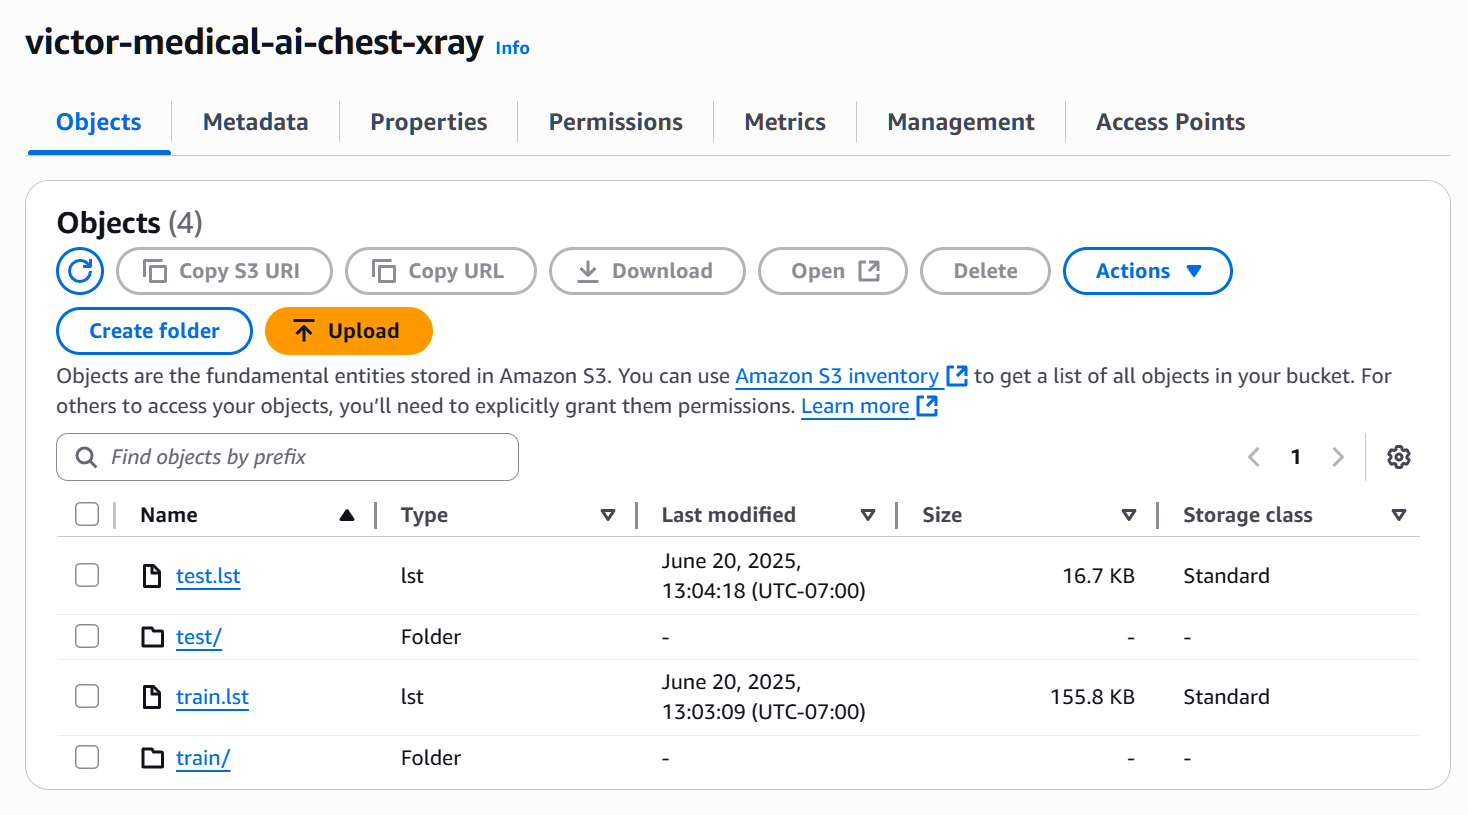

In [33]:
# # Add this to your user if you are not in root user to give permission to upload
# {
#   "Version": "2012-10-17",
#   "Statement": [
#     {
#       "Sid": "SageMakerPutToChestXrayBucket",
#       "Effect": "Allow",
#       "Action": [
#         "s3:PutObject",
#         "s3:GetObject",
#         "s3:DeleteObject",
#         "s3:ListBucket"
#       ],
#       "Resource": [
#         "arn:aws:s3:::victor-medical-ai-chest-xray",
#         "arn:aws:s3:::victor-medical-ai-chest-xray/*"
#       ]
#     }
#   ]
# }

In [29]:
bucket='victor-medical-ai-chest-xray'
print("bucket:{}".format(bucket))
region='us-east-1'
print("region:{}".format(region))
roleArn='arn:aws:s3:::victor-medical-ai-chest-xray'
print("roleArn:{}".format(roleArn))

bucket:victor-medical-ai-chest-xray
region:us-east-1
roleArn:arn:aws:s3:::victor-medical-ai-chest-xray


In [30]:
import os

os.environ["DEFAULT_S3_BUCKET"]=bucket

In [36]:
!aws s3 sync ./data/chest_xray/train s3://${DEFAULT_S3_BUCKET}/train/ \
      --no-progress --only-show-errors

In [34]:
!aws s3 sync ./data/chest_xray/test s3://${DEFAULT_S3_BUCKET}/test/

upload: data/chest_xray/test/test_normal0.jpeg to s3://victor-medical-ai-chest-xray/test/test_normal0.jpeg
upload: data/chest_xray/test/test_normal102.jpeg to s3://victor-medical-ai-chest-xray/test/test_normal102.jpeg
upload: data/chest_xray/test/test_normal10.jpeg to s3://victor-medical-ai-chest-xray/test/test_normal10.jpeg
upload: data/chest_xray/test/test_normal1.jpeg to s3://victor-medical-ai-chest-xray/test/test_normal1.jpeg
upload: data/chest_xray/test/test_normal100.jpeg to s3://victor-medical-ai-chest-xray/test/test_normal100.jpeg
upload: data/chest_xray/test/test_normal105.jpeg to s3://victor-medical-ai-chest-xray/test/test_normal105.jpeg
upload: data/chest_xray/test/test_normal110.jpeg to s3://victor-medical-ai-chest-xray/test/test_normal110.jpeg
upload: data/chest_xray/test/test_normal109.jpeg to s3://victor-medical-ai-chest-xray/test/test_normal109.jpeg
upload: data/chest_xray/test/test_normal101.jpeg to s3://victor-medical-ai-chest-xray/test/test_normal101.jpeg
upload: dat

In [37]:
import boto3, pathlib

bucket_name = "victor-medical-ai-chest-xray"
local_path  = pathlib.Path("train.lst")           # local file
key         = "train.lst"                         # object key

s3 = boto3.resource("s3")
s3.Bucket(bucket_name).Object(key).upload_file(str(local_path))

In [38]:
import boto3, pathlib

bucket_name = "victor-medical-ai-chest-xray"
local_path  = pathlib.Path("test.lst")           # local file
key         = "test.lst"                          # object key

s3 = boto3.resource("s3")
s3.Bucket(bucket_name).Object(key).upload_file(str(local_path))

# Training and hyperparamter tuning

I have the best parameters so you dont have to do this step if you don't want to save money

In [3]:
bucket='victor-medical-ai-chest-xray'
print("bucket:{}".format(bucket))
region='us-east-1'
print("region:{}".format(region))
roleArn='arn:aws:s3:::victor-medical-ai-chest-xray'
print("roleArn:{}".format(roleArn))

bucket:victor-medical-ai-chest-xray
region:us-east-1
roleArn:arn:aws:s3:::victor-medical-ai-chest-xray


In [42]:
import sagemaker
from sagemaker import image_uris
import boto3
from sagemaker import get_execution_role
sess=sagemaker.Session()

algorithm_image=image_uris.retrieve(
    region=boto3.Session().region_name,
    framework="image-classification"
)

s3_output_location=f"s3://{bucket}/models/image_model"
print(s3_output_location)
print(algorithm_image)

s3://victor-medical-ai-chest-xray/models/image_model
811284229777.dkr.ecr.us-east-1.amazonaws.com/image-classification:1


In [43]:
role=get_execution_role()
print(role)

arn:aws:iam::940482439056:role/service-role/AmazonSageMaker-ExecutionRole-20250619T174524


https://sagemaker.readthedocs.io/en/stable/api/training/estimators.html

In [44]:
import sagemaker
img_classifier_model=sagemaker.estimator.Estimator(
    algorithm_image,
    role=role,
    instance_count=1,
    instance_type="ml.p2.xlarge",
    volume_size=50,
    max_run=432000,
    input_mode="File",
    output_path=s3_output_location,
    sagemaker_session=sess
)
print(img_classifier_model)

In [8]:
import glob 
count=0

for filepath in glob.glob('/home/sagemaker-user/data/chest_xray/train/*.jpeg'):
    count+=1
print(count)

0


In [46]:
count=5216

https://docs.aws.amazon.com/sagemaker/latest/dg/IC-Hyperparameter.html

In [47]:
# Note this is not optimal but I want to save money
# In enterprise, you want to train 50 epoch and tune 
img_classifier_model.set_hyperparameters(
    image_shape='3,224,224',
    num_classes=2,
    use_pretrained_model=1,
    num_training_samples=count,
    augmentation_type='crop_color_transform',
    # One epoch = one full pass through your entire training dataset.*
    # Running more epochs lets the model keep refining its weights,
    # usually improving accuracy up to a point.
    # Fewer epochs finish sooner (and cost less on SageMaker),
    # but risk under-fitting because the model hasn’t “seen” the data enough times.
    epochs=15,
    early_stopping=True,
    early_stopping_min_epochs=8,
    early_stopping_tolerance=0.0,
    early_stopping_patience=5,
    # as we are near higher epoch we decrease our learning rate by a factor of .1
    lr_scheduler_factor=0.1,
    lr_scheduler_step='8,10,12'
)

https://docs.aws.amazon.com/sagemaker/latest/dg/automatic-model-tuning-define-ranges.html

In [50]:
from sagemaker.tuner import CategoricalParameter,ContinuousParameter,HyperparameterTuner

hyperparameter_ranges={
    # Learning rate (η): controls how big a step the optimizer takes
    # when updating weights.  Too small → slow convergence; too
    # large → overshoot / divergence.  Tuned on a log scale here
    # between 0.01 and 0.1.
    "learning_rate":ContinuousParameter(0.01,0.1),

    # Mini-batch size: how many training samples are processed
    # before the model’s weights are updated.  Smaller batches
    # give noisier gradients (may generalize better) but take
    # longer per epoch; larger batches are faster per epoch but
    # need more GPU memory.
    "mini_batch_size":CategoricalParameter([8,16,32]),

    # Optimizer: the algorithm that adjusts model weights based
    # on gradients.
    #   - "sgd"  – Stochastic Gradient Descent (with momentum).
    #   - "adam" – Adaptive Moment Estimation (adaptive LR per weight).
    "optimizer":CategoricalParameter(["sgd","adam"])
}

In [54]:
# goal: maxmize the arruacy
objective_metric_name="validation:accuracy"
objective_type="Maximize"
max_jobs=5
max_parallel_jobs=1

https://sagemaker.readthedocs.io/en/stable/api/training/tuner.html
https://docs.aws.amazon.com/sagemaker/latest/dg/automatic-model-tuning-how-it-works.html

In [53]:
tuner=HyperparameterTuner(estimator=img_classifier_model,
                         objective_metric_name=objective_metric_name,
                         hyperparameter_ranges=hyperparameter_ranges,
                         objective_type=objective_type,
                         max_jobs=max_jobs,
                         max_parallel_jobs=max_parallel_jobs  
                         )

train
- A folder of JPEG/PNG images (either split into class-specific sub-directories or kept flat). These are the raw images the model uses for learning.

validation
- Another folder of images in the same format as train. These images are not used to update weights; instead, the algorithm evaluates them after each epoch to report validation loss and accuracy.

train_lst
- An MXNet-style .lst index file that lists each training image on its own line as
- This mapping is handy when your images are not organized in class sub-folders; it tells the algorithm which label belongs to which image.

validation_lst
- A matching .lst file for the validation set, providing the same label-to-image mapping so SageMaker can compute validation metrics correctly.

In [55]:
from sagemaker.session import TrainingInput

model_inputs={
    "train":sagemaker.inputs.TrainingInput(s3_data=f"s3://{bucket}/train/",content_type="application/x-image"),
    "validation":sagemaker.inputs.TrainingInput(s3_data=f"s3://{bucket}/test/",content_type="application/x-image"),
    "train_lst":sagemaker.inputs.TrainingInput(s3_data=f"s3://{bucket}/train.lst",content_type="application/x-image"),
    "validation_lst":sagemaker.inputs.TrainingInput(s3_data=f"s3://{bucket}/test.lst",content_type="application/x-image"),
}

In [56]:
import time 
job_name_prefix="classifier"
timestamp=time.strftime("-%Y-%m-%d-%H-%M-%S",time.gmtime())
job_name=job_name_prefix+timestamp

In [58]:
# tuner.fit(inputs=model_inputs,job_name=job_name,logs=True)

You can go to cloudwatch to see your logs

Also, the model should be saved to your S3 bucket

You need to find your best hyperparameter model and copy the S3 url

In [ ]:
import time, sagemaker, boto3
from sagemaker import image_uris, get_execution_role

# ── session / bucket / role ────────────────────────────
sess    = sagemaker.Session()
region  = sess.boto_region_name
bucket  = sess.default_bucket()
role    = get_execution_role()

# built-in Image Classification container URI
algo_image = image_uris.retrieve(region=region, framework="image-classification")

# where the final model.tar.gz will land
s3_output = f"s3://{bucket}/models/image_model"

estimator = sagemaker.estimator.Estimator(
    image_uri       = algo_image,
    role            = role,
    instance_count  = 1,
    instance_type   = "ml.g4dn.xlarge",     # change if you want a cheaper GPU
    volume_size     = 50,
    max_run         = 432000,
    input_mode      = "File",
    output_path     = s3_output,
    sagemaker_session = sess,
)

# ── plug in the best hyper-parameters ──────────────────
estimator.set_hyperparameters(
    # core image/class info
    image_shape              = "3,224,224",
    num_classes              = 2,
    num_training_samples     = 5216,
    use_pretrained_model     = 1,

    # training schedule
    epochs                   = 15,
    mini_batch_size          = 32,
    learning_rate            = 0.020544595141051232,
    optimizer                = "adam",

    # augmentation & regularisation
    augmentation_type        = "crop_color_transform", # container-supported tag
    early_stopping           = 1,      # use 1/0, not True/False
    early_stopping_min_epochs= 8,
    early_stopping_patience  = 5,
    early_stopping_tolerance = 0.0,

    # learning-rate scheduler
    lr_scheduler_factor      = 0.1,
    lr_scheduler_step        = "8,10,12",
)

# ── input channels ──────
model_inputs = {
    "train":          sagemaker.inputs.TrainingInput(f"s3://{bucket}/train/",        content_type="application/x-image"),
    "validation":     sagemaker.inputs.TrainingInput(f"s3://{bucket}/test/",         content_type="application/x-image"),
    "train_lst":      sagemaker.inputs.TrainingInput(f"s3://{bucket}/train.lst",     content_type="application/x-image"),
    "validation_lst": sagemaker.inputs.TrainingInput(f"s3://{bucket}/test.lst",      content_type="application/x-image"),
}

# ── launch ONE cost-effective training job ─────────────
job_name = "classifier-" + time.strftime("%Y%m%d-%H%M%S", time.gmtime())
estimator.fit(model_inputs, job_name=job_name, logs=True)

# Deployment local trained model to Sagemaker

Go to Amazon Sagemaker and under inference, click on endpoints and it should be InService

In [4]:
import time
import sagemaker
from sagemaker import get_execution_role
from sagemaker.pytorch import PyTorchModel
from sagemaker.serializers import IdentitySerializer
from sagemaker.deserializers import JSONDeserializer

# Initialize
role = get_execution_role()
model_data_uri = "s3://victor-medical-ai-chest-xray/models/model.tar.gz"
endpoint_name = "Demo-image-classifier-pneumonia"

# Load pre-built model package
pytorch_model = PyTorchModel(
    model_data=model_data_uri,
    role=role,
    framework_version="2.1.0",
    py_version="py310",
)

# Deploy
print("Deploying model...")
predictor = pytorch_model.deploy(
    initial_instance_count=1,
    instance_type="ml.m4.xlarge",   # CPU; use ml.g4dn.xlarge for GPU,
    endpoint_name=endpoint_name,
    serializer=IdentitySerializer(content_type="application/x-image"),
    deserializer=JSONDeserializer(),
)

print(f"Endpoint is live: {predictor.endpoint_name}")

Deploying model...
--------------------!Endpoint is live: Demo-image-classifier-pneumonia


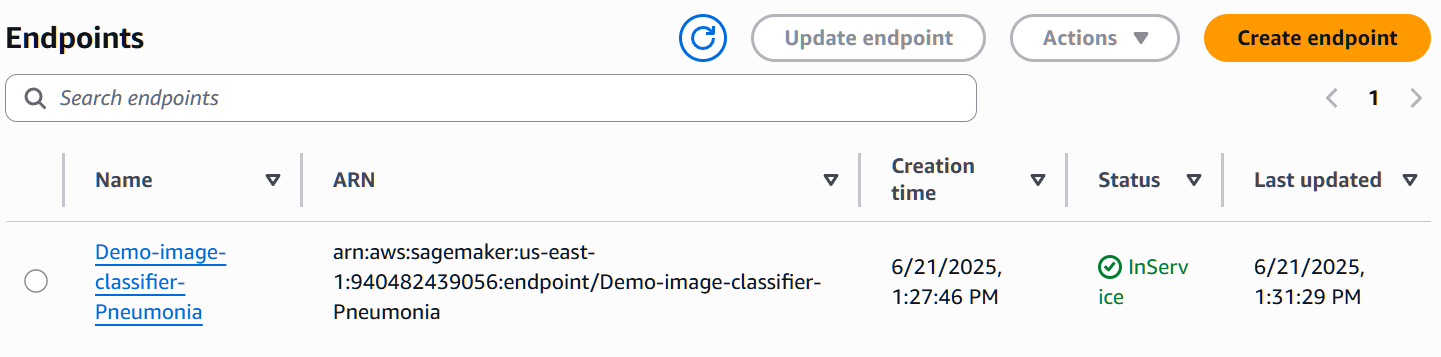

# Local Inference

https://sagemaker.readthedocs.io/en/stable/api/inference/serializers.html#sagemaker.base_serializers.IdentitySerializer

In [5]:
# Test the endpoint
import os
import json
def test_endpoint(image_path):
    """Test the deployed endpoint with an image"""
    try:
        with open(image_path, "rb") as f:
            response = predictor.predict(f.read())
        
        print("Prediction successful!")
        print(f"Response: {json.dumps(response, indent=2)}")
        
        return response
        
    except Exception as e:
        print(f"Prediction failed: {str(e)}")
        return None

# Test with your image
test_img = "data/chest_xray/val/val_pneumonia0.jpeg"
if os.path.exists(test_img):
    result = test_endpoint(test_img)
else:
    print(f"Test image not found: {test_img}")

Prediction successful!
Response: {
  "probabilities": [
    0.0005518265534192324,
    0.9994481205940247
  ],
  "predicted_class": 1,
  "predicted_label": "PNEUMONIA",
  "confidence": 0.9994481205940247
}


In [6]:
import glob
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

val_files = glob.glob("data/chest_xray/val/*.jpeg")

y_true, y_pred = [], []

for fp in val_files:
    with open(fp, "rb") as f:
        result = predictor.predict(f.read())
    
    predicted_class = result["predicted_class"]
    true_class = 0 if "normal" in fp.lower() else 1
    
    y_true.append(true_class)
    y_pred.append(predicted_class)

print("Confusion matrix:\n", confusion_matrix(y_true, y_pred))
print("\nClassification report:\n", classification_report(y_true, y_pred))

Confusion matrix:
 [[8 0]
 [1 7]]

Classification report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.88      0.93         8

    accuracy                           0.94        16
   macro avg       0.94      0.94      0.94        16
weighted avg       0.94      0.94      0.94        16



In [7]:
# remember to shutdown everything after you are done
# end points
# juypter notebook

# you can go to sagemaker, inference, endpoints to check

In [ ]:
# shut the endpoint down when you’re done
predictor.delete_endpoint()